#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020
# Spotlight on image processing using OpenCV
Name: Wanqiu Wang
## 1. Introduction
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.The library has more than 2500 optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. In OpenCV Python, all the OpenCV array structures are converted to-and-from Numpy arrays. 
## 2. An example of image processing
In this spotlight I will detect face and eyes in a picture and explore some other basic functions in OpenCV.
### 2.1 Installation
* run pip install opencv-python if you need only main modules
* run pip install opencv-contrib-python if you need both main and contrib modules (check extra modules listing from OpenCV documentation)  
 Import the package:

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Load/show/save image

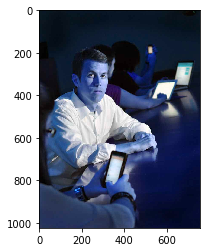

In [4]:
img = cv2.imread('prof_JC.jpg')
img2 = img[:,:,::-1]
plt.imshow(img)

As you can see, the picture's color is kind of strange, that's because Opencv's color channel order is [B, G, R], but matplotlib's color channel order is [R, G, B].
Solution: Reposition R and B

(1024, 755, 3)


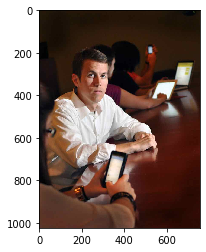

In [5]:
img = img[:,:,(2,1,0)]
plt.imshow(img)
print (img.shape)

### 2.3 Face Detection using Haar Cascades
Object Detection using Haar feature-based cascade classifiers is an effective object detection method. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.   
OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. Let’s create face and eye detector with OpenCV.
First we need to load the required XML classifiers. Then load our input image (or video) in grayscale mode.

In [6]:
face_cascade = cv2.CascadeClassifier("D:\\ruanjian\\annaconda\\anna\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
img = cv2.imread('prof_JC.jpg')
img1=cv2.imread('prof_JC.jpg')
eye_cascade = cv2.CascadeClassifier('D:\\ruanjian\\annaconda\\anna\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#### Image ROI
Sometimes, we will have to play with certain region of images. For /face/eye detection in images, first perform face detection over the image until the face is found, then search within the face region for faces/eyes. This approach improves accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).
ROI is again obtained using Numpy indexing. 

True

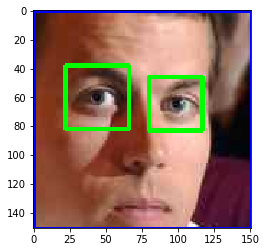

In [7]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    img_show=img1[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
img_show = img_show[:,:,(2,1,0)]
roi_color=roi_color[:,:,(2,1,0)]
plt.imshow(roi_color)
cv2.imwrite("prof_JC2.jpg", img_show)

### 2.4 Image preprocessing
In image processing, the quality of the image directly affects the design of the recognition algorithm and the accuracy of the effect. Therefore, pre-processing is required before image processing (feature extraction, segmentation, matching, and recognition). The main purpose of image preprocessing is to eliminate irrelevant information in the image, restore useful real information, enhance the detectability of the relevant information, and simplify the data to the maximum, thereby improving the reliability of feature extraction, image segmentation, matching and recognition.  
The general pre-processing process contains grayscale, geometric transformation, noise removement and so on.
#### 2.4.1 Changing Colorspaces-Gray scale
The image grayscale will remove the color information contained in the color image. This image preprocessing process only retains the brightness information of the image.

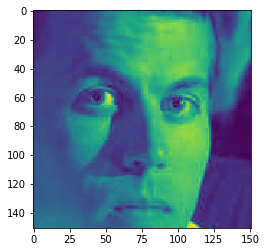

In [8]:
img = cv2.imread('prof_JC2.jpg')
grayimg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg)

#### 2.4.2 Geometric Transformations
OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input

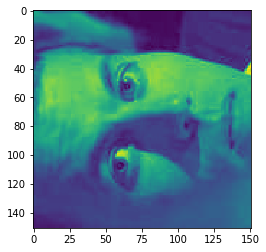

In [9]:
img = cv2.imread('prof_JC2.jpg',0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
roi_color=roi_color[:,:,(2,1,0)]
plt.imshow(dst)

#### 2.4.3 noise removement
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied.

#####  Averaging
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). 

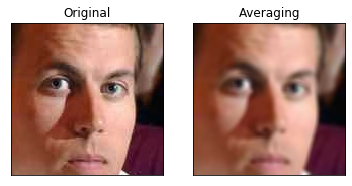

In [10]:
img = cv2.imread('prof_JC2.jpg')
blur1 = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur1),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

##### Gaussian Filtering
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). 

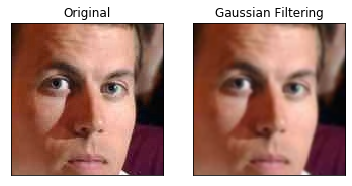

In [20]:
img = cv2.imread('prof_JC2.jpg')
blur2 = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('Gaussian Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

#####  Median Filtering
Here,the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.

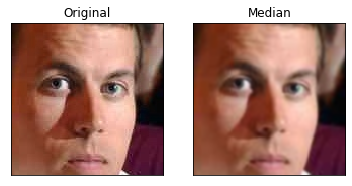

In [12]:
img = cv2.imread('prof_JC2.jpg')
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

##### Erosion
This operation is the sister of dilation. What this does is to compute a local minimum over the area of the kernel.The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

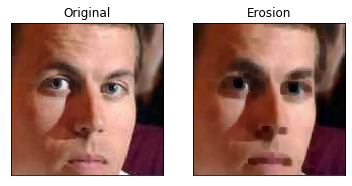

In [13]:
img = cv2.imread('prof_JC2.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Erosion')
plt.xticks([]), plt.yticks([])
plt.show()

##### Dilation
This operations consists of convoluting an image A with some kernel (B), which can have any shape or size, usually a square or circle.It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

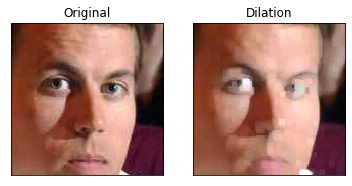

In [14]:
img = cv2.imread('prof_JC2.jpg')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Dilation')
plt.xticks([]), plt.yticks([])
plt.show()

##### Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

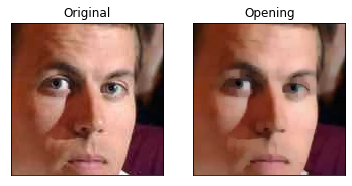

In [15]:
img = cv2.imread('prof_JC2.jpg')
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

##### Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

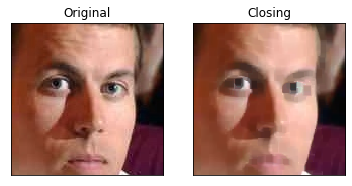

In [16]:
img = cv2.imread('prof_JC2.jpg')
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.5 Feature Detection
When we look at the above image, our brain automatically registers the content more towards the mid and right side portions of the image than the left side because the intensity variations are more in the middle and right side portions of the image.
Similarly for solving computer vision problems, the machine needs to understand the important aspects of an image.
Mathematical representations of key areas in an image are the features. Features are the vector representations of the visual content from an image so that we can perform mathematical operations on them. Features from an image plays an important role in computer vision for variety of applications including object detection, motion estimation, segmentation, image alignment and a lot more.     
People always asking: What are the main features in an image? How can finding those features be useful to us?   

#### 2.5.1  Harris Corner Detection
We will see the functions: cv2.cornerHarris(), cv2.cornerSubPix()

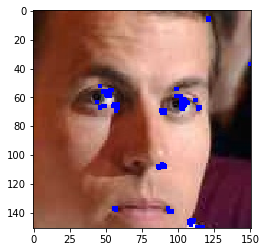

In [17]:
img = cv2.imread('prof_JC2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)

#### 2.5.2 Shi-Tomasi Corner Detector & Good Features to Track
We will see the function: cv2.goodFeaturesToTrack()

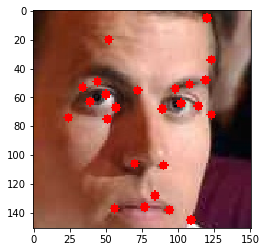

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('prof_JC2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img)#,plt.show()

### 2.6 Arithmetic Operations on Images
There are several arithmetic operations on images like addition, subtraction, bitwise operations etc.
#### Bitwise Operations  
This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc.

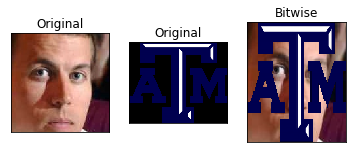

In [19]:
img = cv2.imread('prof_JC2.jpg')
img3 = cv2.imread('tamu.png')
img1 = cv2.resize(img, (92, 112), interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img3, (92, 112), interpolation=cv2.INTER_LINEAR)
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img3),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img1),plt.title('Bitwise')
plt.xticks([]), plt.yticks([])
plt.show()